<a href="https://colab.research.google.com/github/victoriavallejo0/ProyectoI/blob/main/TP_4_Proyecto_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto I - TP4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_id = '1GGhFoOLjYSs2ksD9-X5Y7rEfmYASwEIU'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)
data.head()

,Make,Model,First Ever Reg'd,Reg'd in Jersey,CC,Colour,CO2,Catgeory,Fuel
0,Peugeot,BOXPRO 333L1H1 120,08/12/2020,08/12/2020,2200.0,White,154.0,"Light Commercial Vehicles < 3,500 kgs",Heavy Oil
1,Peugeot,BOXER 335 PRO L2H2 BHDI,19/03/2021,14/04/2021,2200.0,White,243.0,"Light Commercial Vehicles < 3,500 kgs",Heavy Oil
2,John Deere,4520,12/10/2011,12/10/2011,2440.0,Green,NaN,Agricultural,Heavy Oil
3,Volkswagen,PASSAT SE 2.0,15/03/2006,15/03/2006,1968.0,Silver,NaN,Cars,Heavy Oil
4,Skoda,OCTAVIA AMBIENTE TDI,13/08/2002,13/08/2002,1896.0,Orange,NaN,Cars,Heavy Oil


#### Data Type

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127669 entries, 0 to 127668
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Make              127669 non-null  object 
 1   Model             126679 non-null  object 
 2   First Ever Reg'd  127668 non-null  object 
 3   Reg'd in Jersey   127668 non-null  object 
 4   CC                127594 non-null  float64
 5   Colour            127580 non-null  object 
 6   CO2               44927 non-null   float64
 7   Catgeory          127669 non-null  object 
 8   Fuel              127649 non-null  object 
dtypes: float64(2), object(7)
memory usage: 8.8+ MB


In [7]:
data.rename(columns={"First Ever Reg'd": "First_Reg"}, inplace=True)
data.rename(columns={"Reg'd in Jersey": "Reg_Jersey"}, inplace=True)
date_format = '%d/%m/%Y'

# Cols a formato date
date_columns = ['First_Reg', 'Reg_Jersey']
for column in date_columns:
    data[column] = pd.to_datetime(data[column], format=date_format, errors='coerce')

data.rename(columns={'Catgeory': 'Category'}, inplace=True)

#### Missing values

In [8]:
from tabulate import tabulate
def resumen_missing(data):
    total = data.isnull().sum()
    total1 = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

In [9]:
print(resumen_missing(data))

            Total   Percent
CO2         82742  0.648098
Model         990  0.007754
Colour         89  0.000697
CC             75  0.000587
Fuel           20  0.000157
First_Reg       1  0.000008
Reg_Jersey      1  0.000008
Make            0  0.000000
Category        0  0.000000


In [10]:
total = data.isnull().sum()
total1 = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
CO2,82742,0.648098
Model,990,0.007754
Colour,89,0.000697
CC,75,0.000587
Fuel,20,0.000157
First_Reg,1,0.000008
Reg_Jersey,1,0.000008
Make,0,0.000000
Category,0,0.000000


In [11]:
mask = (data['Fuel'] == '*') | data['Fuel'].isna()
data = data[~mask]

##### Es muy alto el % de missings en CO2

###### Media de CO2 por fuel para luego llenar los missing values

In [12]:
mean_by_fuel = data.groupby('Fuel')['CO2'].mean()

In [13]:
mean_by_fuel

Fuel
Electric             0.000000
Electric Diesel    155.250000
Gas                160.000000
Gas Bi Fuel        385.000000
Heavy Oil          157.283115
Hybrid Electric     88.883192
Petrol             136.542820
Steam                     NaN
Name: CO2, dtype: float64

In [14]:
data['CO2'] = data.apply(lambda row: mean_by_fuel[row['Fuel']] if pd.isna(row['CO2']) else row['CO2'], axis=1)

In [15]:
total = data.isnull().sum()
total1 = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Model,988,0.007740
CC,73,0.000572
Colour,69,0.000541
CO2,3,0.000024
First_Reg,1,0.000008
Reg_Jersey,1,0.000008
Make,0,0.000000
Category,0,0.000000
Fuel,0,0.000000


##### Ahora fuel no presenta na, cuando antes tenía 20

##### CC = 0 quiere decir eléctrico

In [16]:
data.loc[data['Fuel'] == 'Electric', 'CC'] = data.loc[data['Fuel'] == 'Electric', 'CC'].fillna(0)

In [17]:
data = data.dropna()

In [18]:
print('Cantidad de Filas y Columnas:',data.shape)

Cantidad de Filas y Columnas: (126544, 9)


##### Sin ningún dato n.a quedan 126544 registros

## Outliers

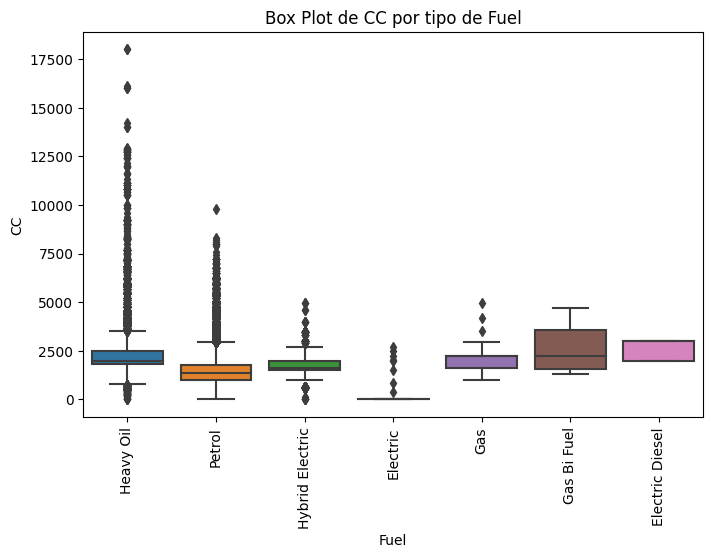

In [19]:
# Box plot CC
plt.figure(figsize=(8, 5))
sb.boxplot(x='Fuel', y='CC', data=data)
plt.xticks(rotation=90)
plt.xlabel('Fuel')
plt.ylabel('CC')
plt.title('Box Plot de CC por tipo de Fuel')
plt.show()

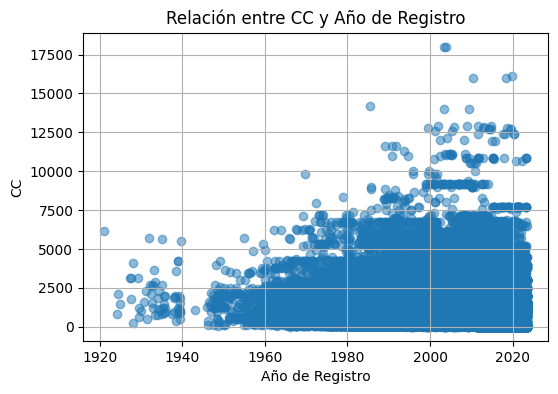

In [20]:
# Dispersión CC y Año Reg
plt.figure(figsize=(6, 4))
plt.scatter(data['First_Reg'], data['CC'], alpha=0.5)
plt.title('Relación entre CC y Año de Registro')
plt.xlabel('Año de Registro')
plt.ylabel('CC')
plt.grid(True)
plt.show()

In [21]:
fuel_counts = data['Fuel'].value_counts()

# Muestra los resultados
print(fuel_counts)

Petrol             87902
Heavy Oil          33850
Hybrid Electric     2665
Electric            2056
Gas                   53
Electric Diesel       12
Gas Bi Fuel            6
Name: Fuel, dtype: int64


<ipython-input-22-68be210ac15e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year


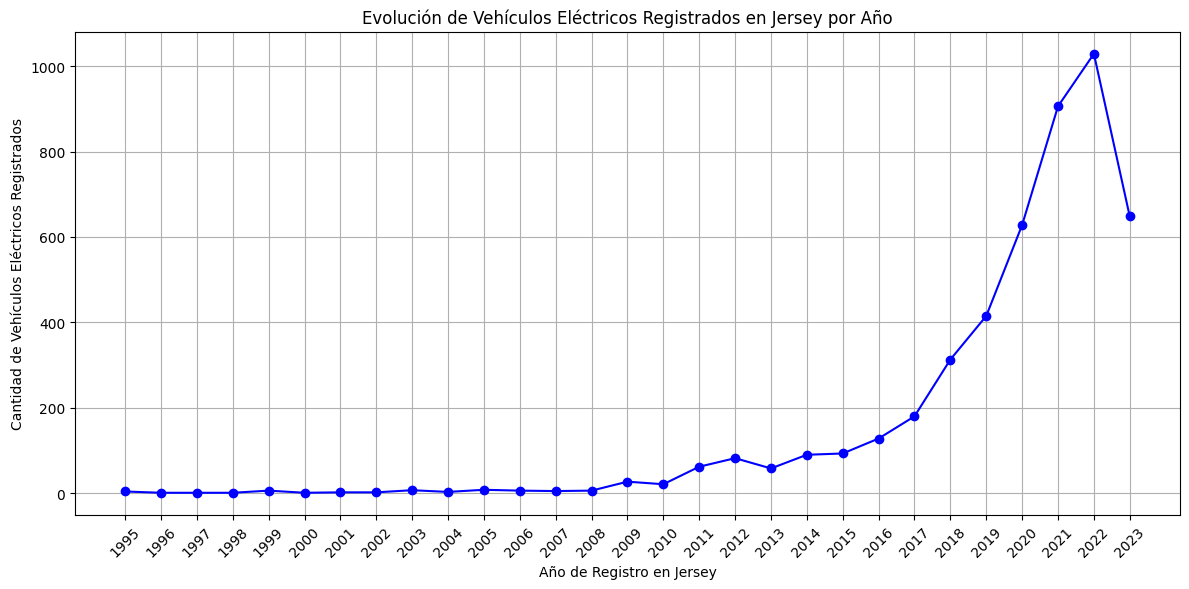

In [22]:
electricos = data[data['Fuel'].str.contains('Electric', case=False, na=False)]
electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year
conteo_por_año = electricos.groupby('Año_Registro_Jersey')['Fuel'].count()

# Crear un gráfico de barras para mostrar la evolución de registros a lo largo de los años
plt.figure(figsize=(12, 6))
plt.plot(conteo_por_año.index, conteo_por_año.values, marker='o', linestyle='-', color='b')
plt.title('Evolución de Vehículos Eléctricos Registrados en Jersey por Año')
plt.xlabel('Año de Registro en Jersey')
plt.ylabel('Cantidad de Vehículos Eléctricos Registrados')
plt.grid(True)
plt.xticks(conteo_por_año.index, rotation=45)

plt.tight_layout()
plt.show()

In [23]:
tabla_hor = pd.DataFrame(conteo_por_año).T
tabla_hor

Año_Registro_Jersey,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Fuel,4,1,1,1,6,1,2,2,7,3,...,90,93,128,180,313,415,628,906,1029,648


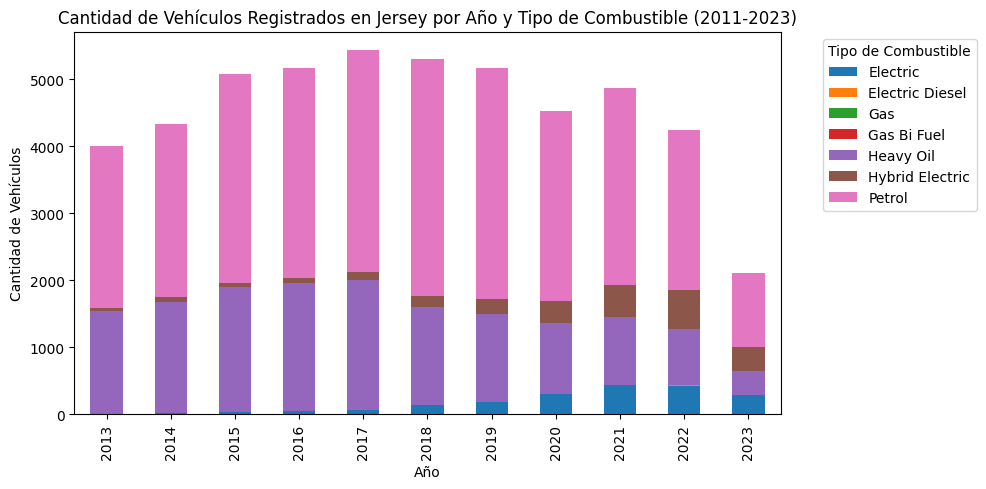

In [55]:
data_años = data[(data['Reg_Jersey'].dt.year >= 2013) & (data['Reg_Jersey'].dt.year <= 2023)]

# crosstab vehículos x año y Fuel
tabla1 = pd.crosstab(data_años['Reg_Jersey'].dt.year, data_años['Fuel'])

# Stacked bar graph
tabla1.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Cantidad de Vehículos Registrados en Jersey por Año y Tipo de Combustible (2011-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehículos')
plt.legend(title='Tipo de Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

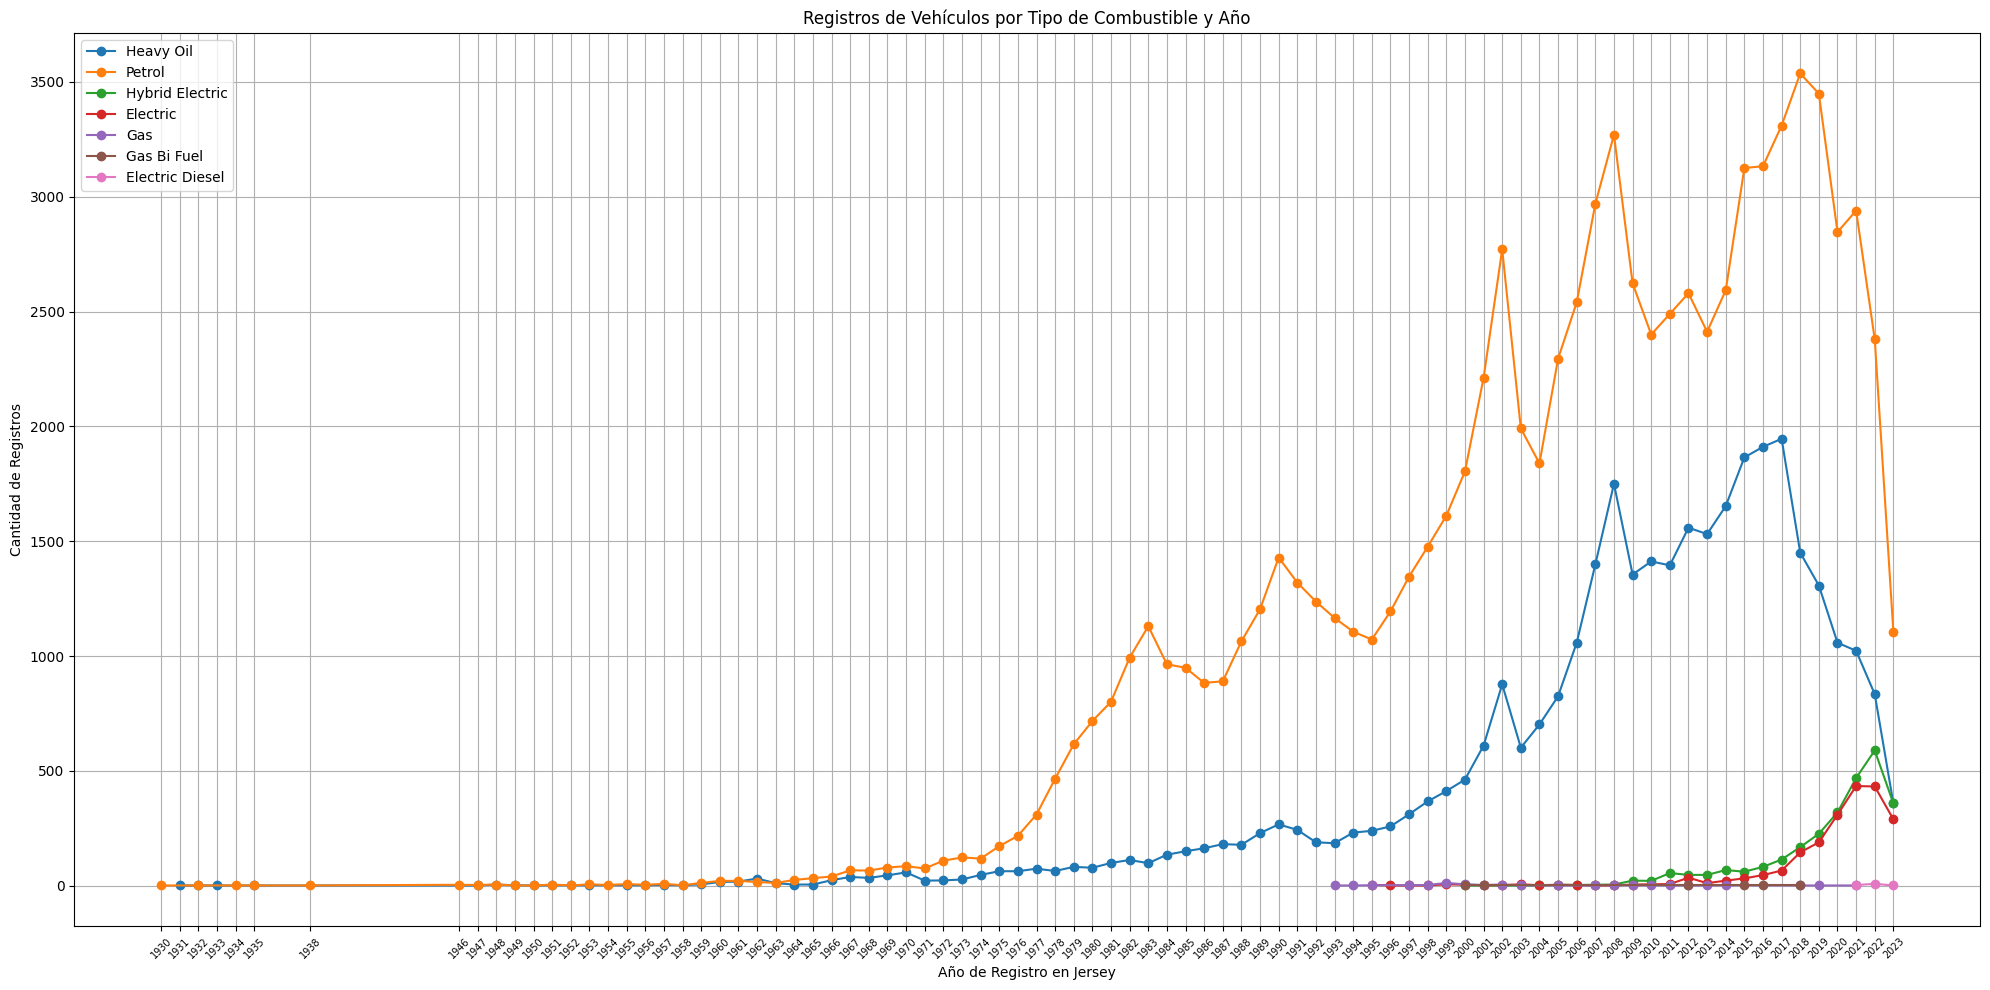

In [57]:
plt.figure(figsize=(20, 10))
ax = plt.gca()
años = data['Reg_Jersey'].dt.year.unique()

for fuel in data['Fuel'].unique():
    fuel_data = data[data['Fuel'] == fuel]
    registro_por_año = fuel_data['Reg_Jersey'].dt.year.value_counts().sort_index()
    plt.plot(registro_por_año.index, registro_por_año.values, marker='o', label=fuel)

plt.title('Registros de Vehículos por Tipo de Combustible y Año')
plt.xlabel('Año de Registro en Jersey')
plt.ylabel('Cantidad de Registros')
plt.grid(True)

plt.legend()
plt.xticks(años, rotation=45, fontsize=7)

plt.tight_layout()
plt.show()

In [30]:
tabla1

Fuel,Electric,Electric Diesel,Gas,Gas Bi Fuel,Heavy Oil,Hybrid Electric,Petrol
Reg_Jersey,,,,,,,
2013,11,0,1,0,1531,47,2412
2014,22,0,2,0,1653,68,2593
2015,32,0,0,1,1865,61,3125
2016,46,0,0,1,1911,82,3133
2017,66,0,0,0,1946,114,3310
2018,145,0,1,1,1450,168,3537
2019,189,0,1,0,1307,226,3449
2020,309,0,0,0,1058,319,2846
2021,434,3,1,0,1023,469,2940


In [31]:
modelo_comun = data['Model'].value_counts().idxmax()
cantidad_registro = data['Model'].value_counts().max() # Cantidad
fuel_modelo_comun = data[data['Model'] == modelo_comun]['Fuel'].iloc[0] # su Fuel

# Imprimir los resultados
print("El modelo más comúnmente registrado en Jersey es:", modelo_comun)
print("Su tipo de combustible:", fuel_modelo_comun)
print("Cantidad de veces registrado:", cantidad_registro)

El modelo más comúnmente registrado en Jersey es: FIESTA ZETEC
Su tipo de combustible: Petrol
Cantidad de veces registrado: 1076


In [32]:
correlacion = data['CC'].corr(data['CO2'], method='pearson')
print("Coeficiente de correlación de Pearson entre CC y CO2:", correlacion)

Coeficiente de correlación de Pearson entre CC y CO2: 0.4368982506221905


######  Existe una correlación positiva moderada entre CC y CO2 de 0.437 , lo que significa que en general a medida que la capacidad cúbica (CC) de un vehículo aumenta también tienden a aumentar sus emisiones de CO2. Sin embargo, la correlación no es extremadamente fuerte, lo cuál indica que otros factores también pueden influir en las emisiones de CO2 de los vehículos.

<ipython-input-50-4a4aa1e04fae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


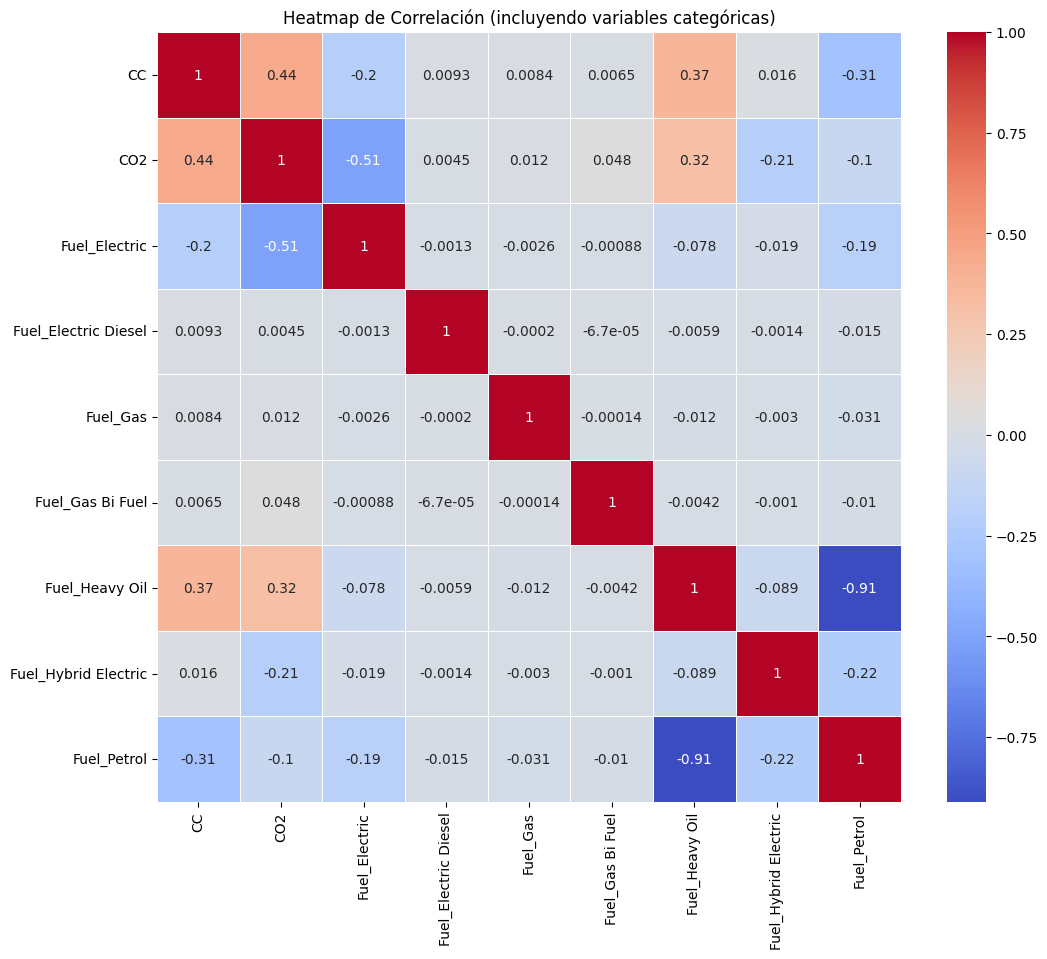

In [50]:
data_encoded = pd.get_dummies(data, columns=['Fuel'])
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Heatmap de Correlación (incluyendo variables categóricas)")
plt.show()

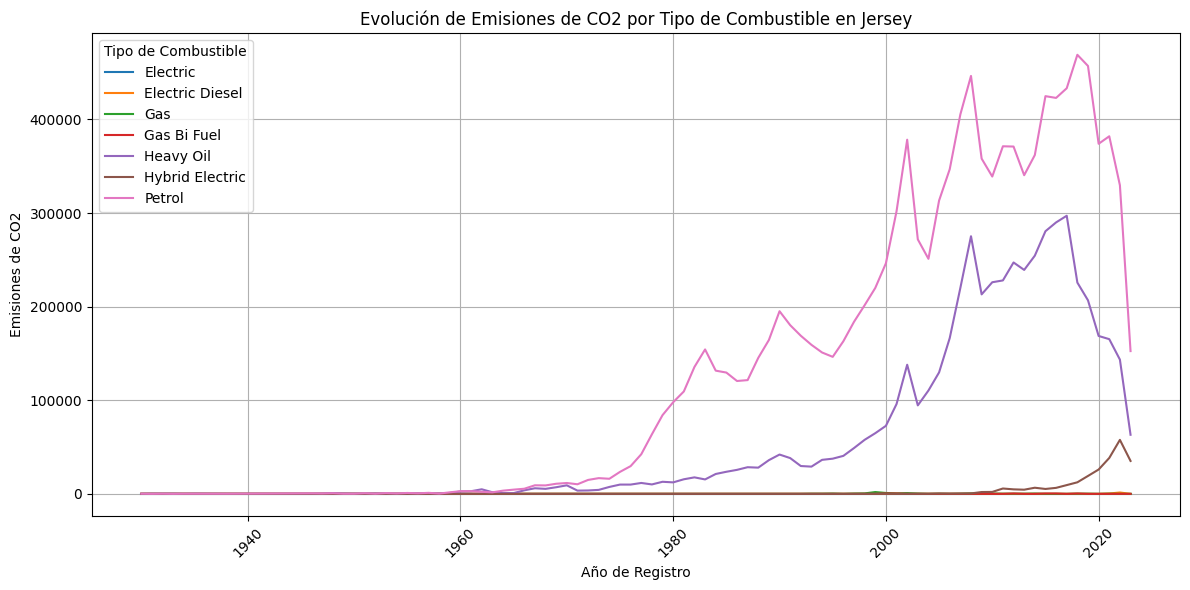

In [52]:
pivot_table = data.pivot_table(index=data['Reg_Jersey'].dt.year, columns='Fuel', values='CO2', aggfunc='sum', fill_value=0)

pivot_table.plot(figsize=(12, 6))
plt.title('Evolución de Emisiones de CO2 por Tipo de Combustible en Jersey')
plt.xlabel('Año de Registro')
plt.ylabel('Emisiones de CO2')
plt.grid(True)
plt.legend(title='Tipo de Combustible')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
electricos = data[data['Fuel'].str.contains('Electric', case=False, na=False)]
electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year
conteo_por_año = electricos.groupby('Año_Registro_Jersey')['Fuel'].count()

percentage_increase = conteo_por_año.pct_change() * 100

# Crear un DataFrame con los resultados
result_df = pd.DataFrame({'Año': conteo_por_año.index, 'Cantidad': conteo_por_año.values, 'Aumento Porcentual': percentage_increase.values})

# Formatear el porcentaje para que se muestre con el número
result_df['Aumento Porcentual'] = result_df['Aumento Porcentual'].map('{:.2f}%'.format)

# Mostrar el DataFrame resultante
result_df

<ipython-input-35-20896f681394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year


,Año,Cantidad,Aumento Porcentual
0,1995,4,nan%
1,1996,1,-75.00%
2,1997,1,0.00%
3,1998,1,0.00%
4,1999,6,500.00%
5,2000,1,-83.33%
6,2001,2,100.00%
7,2002,2,0.00%
8,2003,7,250.00%
9,2004,3,-57.14%


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['Año'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['Cantidad'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *['Año'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *['Cantidad'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result_df, *[[['Año', 'Cantidad']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result_df, *['Año', 'Cantidad', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(result_df, *['Año', 'count()', None], **{})
chart

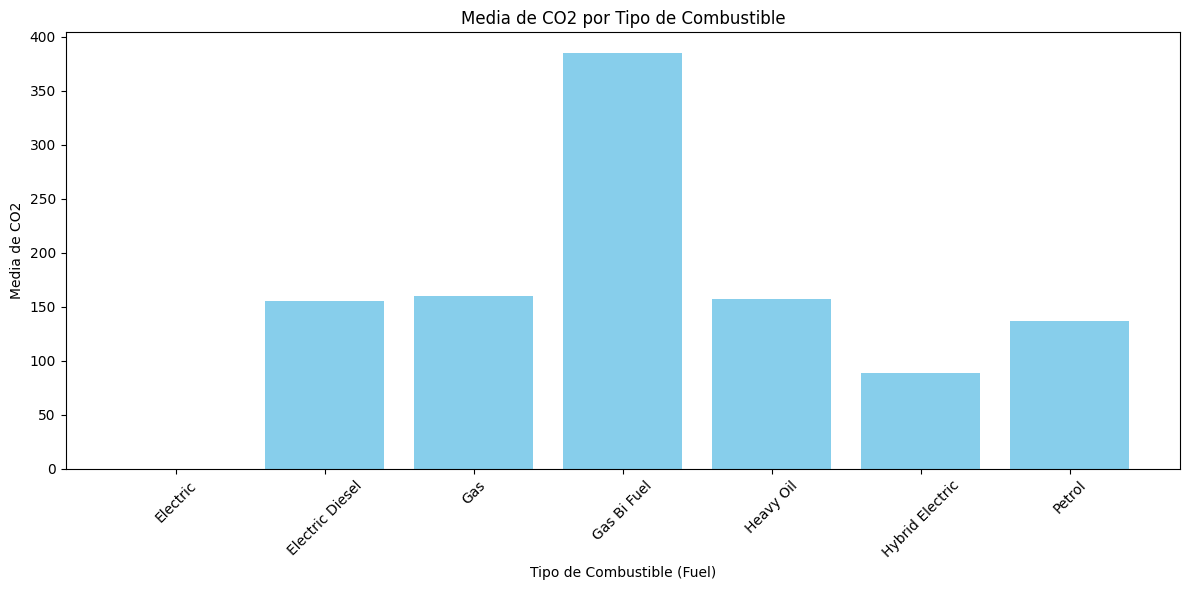

In [36]:
mean_co2_fuel = data.groupby('Fuel')['CO2'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(mean_co2_fuel['Fuel'], mean_co2_fuel['CO2'], color='skyblue')
plt.title('Media de CO2 por Tipo de Combustible')
plt.xlabel('Tipo de Combustible (Fuel)')
plt.ylabel('Media de CO2')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

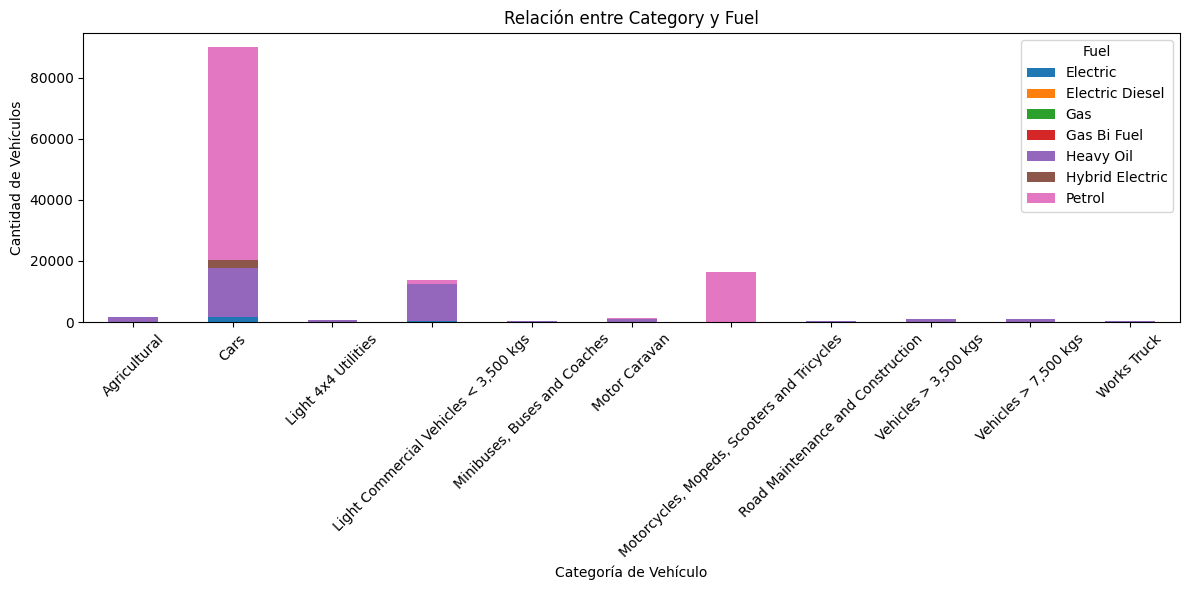

In [54]:
contingency_table = pd.crosstab(data['Category'], data['Fuel'])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre Category y Fuel')
plt.xlabel('Categoría de Vehículo')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()